In [2]:
!pip install textstat
!pip install tensorflow
!pip install keras
!pip install datasets
!pip install transformers

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
import nltk
from nltk.stem.porter import *
import string
import re
import seaborn as sns
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Activation, Embedding, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

import torch
import torch.nn as nn
import torch.nn.functional as F
import transformers
from torch.autograd import Variable
%matplotlib inline

In [3]:
pip install pd

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.model_selection import train_test_split
from datasets import load_dataset
import random

path_to_file = "hatespeech_data_clean_text_for_bert.csv"

data = pd.read_csv(path_to_file,encoding='latin-1')

train, test= train_test_split(data,test_size=0.2, random_state=25)

train.to_csv('train.csv')
test.to_csv('test.csv')
data = load_dataset('csv',data_files={'train': 'train.csv', 'test': 'test.csv'})

Using custom data configuration default-bbb6c88553d30339


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to C:/Users/I059953/.cache/huggingface/datasets/csv/default-bbb6c88553d30339/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
from gensim.utils import pickle
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from pickle import dumps
import pickle
d={...}
d=pickle.dumps(d)



# Creating a embedding matrix
load_pretrained = False
embedding_dimension = 100

if load_pretrained:
    with open('data_for_bert_50_50.csv', 'rb') as file_in:
        model = pickle.load(file_in)
else:
    model = Word2Vec([tweet.split() for tweet in data["train"]["tweet"]], min_count = 2, vector_size = embedding_dimension,
                     window = 10, sg = 1)
    with open('data_for_bert_50_50.csv', 'wb') as file_out:
        pickle.dump(model, file_out)

# tokenize each tweet in dataset
max_vocab_size = len(model.wv.index_to_key)
tokenizer = Tokenizer(num_words = max_vocab_size)
tokenizer.fit_on_texts(data["train"]["tweet"])


In [6]:
# create embedding matrix where each row corresponds to a vector for a word
embedding_matrix = np.zeros([max_vocab_size + 1, embedding_dimension])



In [7]:
# convert tweets to index sequence vectors
X_train_nn = tokenizer.texts_to_sequences(data["train"]["tweet"])
X_test_nn = tokenizer.texts_to_sequences(data["test"]["tweet"])
max_sequence_length = np.array([len(sequence) for sequence in X_train_nn]).max()

# pad index sequence vectors so they all have same length
X_train_nn = pad_sequences(X_train_nn, maxlen = max_sequence_length, padding = 'post', truncating = 'post')
X_test_nn = pad_sequences(X_test_nn, maxlen = max_sequence_length, padding = 'post', truncating = 'post')

# create hate speech label matrix y
y_train_nn = to_categorical(data["train"]["label"])
y_test_nn = to_categorical(data["test"]["label"])

In [8]:
y_test_nn.shape

(4957, 2)

In [9]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(19826, 4)


Unnamed: 0.1  Unnamed: 0  \
0         20694       20694   
1          5697        5697   
2         19767       19767   
3         22656       22656   
4          9848        9848   

                                               tweet  label  
0                               sexy ass yellow bone      0  
1             catleesh i have small pussy size plugs      0  
2  rt TAG aw y'all some hoes hating on that girl ...      0  
3  when chief keef said i aint done turning up bitch      0  
4  hoes always tryna say they look like a celebri...      0

In [10]:
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(4957, 4)


Unnamed: 0.1  Unnamed: 0  \
0         22425       22425   
1         18144       18144   
2         20085       20085   
3         22820       22820   
4          9310        9310   

                                               tweet  label  
0                  vine is filled with pussy lol smh      0  
1  rt TAG TAG can jump into first place tonight i...      0  
2  rt TAG TAG i have a pink fuzzy one amp a silky...      0  
3  who the hell taught you how to fuck bitch toot...      0  
4  fuck you niggah i'm cold amp my aunts said no ...      0

In [11]:
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

In [12]:
pip install sns

Note: you may need to restart the kernel to use updated packages.


C:\Users\I059953\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    18660
1     1166
Name: label, dtype: int64

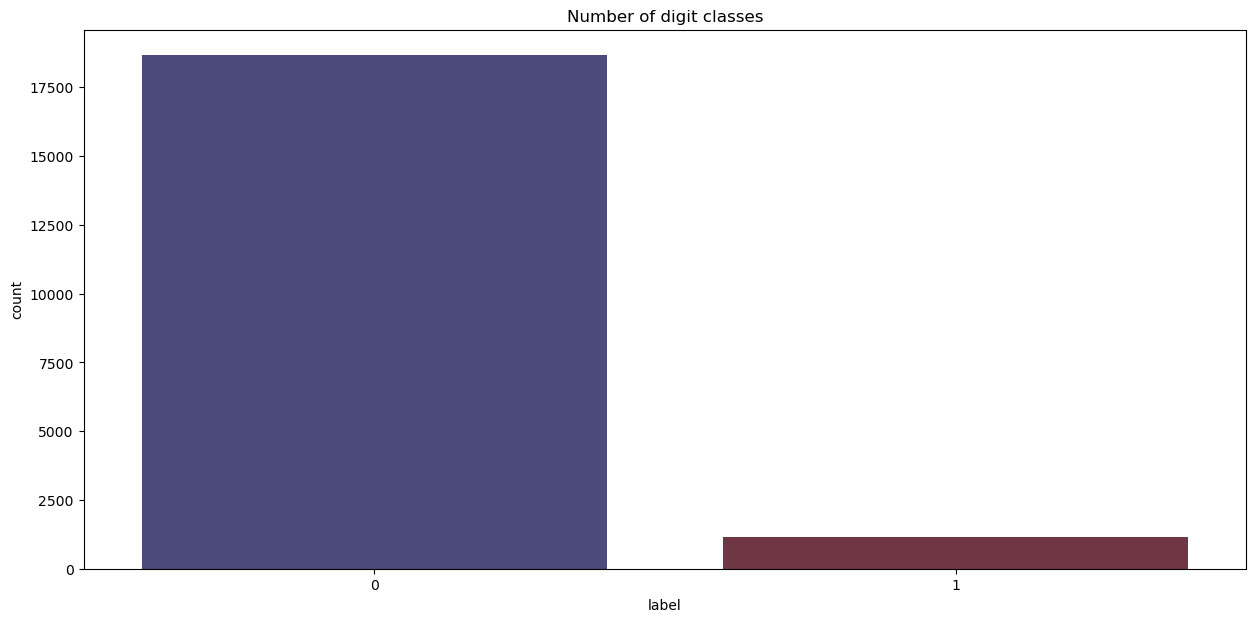

In [13]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

In [14]:
# Split the train and the validation set for the fitting


from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)


x_train shape (17843, 3)
x_test shape (1983, 3)
y_train shape (17843,)
y_test shape (1983,)


In [15]:
filepath_dict = pd.read_excel("Hate Speech Roman Urdu (HS-RU-20).xlsx")
print(filepath_dict)


                                             Sentence  \
0   kya mein bhooka hon? kutia ab tum ney ye pooch...   
1   khawateen ghaas ki tarah hain, inhen baqaidagi...   
2   aik aurat ke tor par aap ko apne ghar ki safai...   
3                     Afghani dehshat gard hotay hain   
4                     tamam sarkari hukkaam chor hain   
..                                                ...   
74  Tharki larky college k bahir larkiyon ko tung ...   
75  Christchurch mein firing sirf ka nishana sirf ...   
76  Molana siyasat kren, mazhabi card istemaal na ...   
77  India mein khwateen k sath rape cases mein iza...   
78        saarfeen k liye bijli mehengi kr di gai hai   

   Neutral (N) / Hostile (H)  
0                          H  
1                          H  
2                          N  
3                          H  
4                          H  
..                       ...  
74                         H  
75                         H  
76                         H  
77   

In [16]:
filepath_dict.head()

Sentence Neutral (N) / Hostile (H)
0  kya mein bhooka hon? kutia ab tum ney ye pooch...                         H
1  khawateen ghaas ki tarah hain, inhen baqaidagi...                         H
2  aik aurat ke tor par aap ko apne ghar ki safai...                         N
3                    Afghani dehshat gard hotay hain                         H
4                    tamam sarkari hukkaam chor hain                         H

In [17]:
filepath_dict.tail()

Sentence  \
74  Tharki larky college k bahir larkiyon ko tung ...   
75  Christchurch mein firing sirf ka nishana sirf ...   
76  Molana siyasat kren, mazhabi card istemaal na ...   
77  India mein khwateen k sath rape cases mein iza...   
78        saarfeen k liye bijli mehengi kr di gai hai   

   Neutral (N) / Hostile (H)  
74                         H  
75                         H  
76                         H  
77                         H  
78                         H

In [18]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [19]:
(train_DA, train_labels), (test_DA, test_labels) = datasets.cifar10.load_data()
train_DA, test_DA = train_DA / 255.0, test_DA / 255.0

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()
model.save('modeel')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

INFO:tensorflow:Assets written to: modeel\assets


INFO:tensorflow:Assets written to: modeel\assets


In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_DA, train_labels, epochs=3, 
                    validation_data=(test_DA, test_labels))

Epoch 1/3
1563/1563 [==============================] - 53s 33ms/step - loss: 1.4798 - accuracy: 0.4620 - val_loss: 1.2111 - val_accuracy: 0.5667
Epoch 2/3
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1109 - accuracy: 0.6063 - val_loss: 1.0086 - val_accuracy: 0.6443
Epoch 3/3
1563/1563 [==============================] - 45s 28ms/step - loss: 0.9469 - accuracy: 0.6670 - val_loss: 0.9610 - val_accuracy: 0.6623


313/313 - 2s - loss: 0.9610 - accuracy: 0.6623 - 2s/epoch - 7ms/step


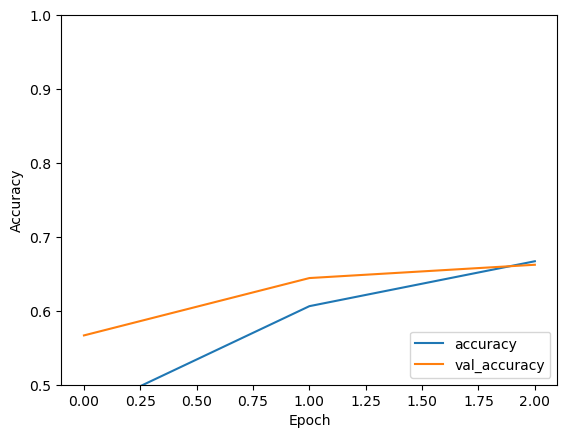

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_DA,  test_labels, verbose=2)

In [25]:
print(test_acc)

0.6622999906539917


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import  numpy as np
from keras.models import load_model
Y_test = np.argmax(test_labels, axis=1)
model_test = load_model('modeel')
y_pred = model_test.predict(test_DA)
y_pred_class = np.argmax(y_pred,axis=1)
cnf_matrix = confusion_matrix(Y_test, y_pred_class)
#plot_confusion_matrix(cnf_matrix, labels=test_labels)

313/313 [==============================] - 2s 6ms/step


In [27]:
print(classification_report(Y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00   10000.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0

    accuracy                           0.00   10000.0
   macro avg       0.00      0.00      0.00   10000.0
weighted avg       0.00      0.00      0.00   10000.0



C:\Users\I059953\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I059953\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I059953\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I059953\Anaconda3\lib\site-packages\sklearn\metr